In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader


from sklearn.model_selection import train_test_split

11501568/11490434 [==============================] - 0s 0us/step


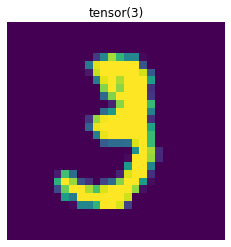

In [2]:
from tensorflow.keras.datasets import mnist


(features_train, targets_train), (features_test, targets_test) = mnist.load_data()

# Convert to float32.

features_train, features_test = np.array(features_train, np.float32), np.array(features_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
num_features=784

features_train, features_test = features_train.reshape([-1, num_features]), features_test.reshape([-1, num_features])

# Normalize images value from [0, 255] to [0, 1].

features_train, features_test = features_train / 255., features_test / 255

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. 
#Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(featuresTrain[10].reshape(28,28))
plt.axis("off")
plt.title(str(targetsTrain[10]))
plt.savefig('graph.png')
plt.show()



In [3]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return (out)

# instantiate ANN
input_dim = 28*28
hidden_dim = 120 
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [4]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.6697431802749634  Accuracy: 52.97999954223633 %
Iteration: 1000  Loss: 0.6481273770332336  Accuracy: 85.12999725341797 %
Iteration: 1500  Loss: 0.6792959570884705  Accuracy: 88.69999694824219 %
Iteration: 2000  Loss: 0.29401394724845886  Accuracy: 89.91999816894531 %
Iteration: 2500  Loss: 0.18586021661758423  Accuracy: 91.06999969482422 %
Iteration: 3000  Loss: 0.33364924788475037  Accuracy: 91.91000366210938 %
Iteration: 3500  Loss: 0.2164355218410492  Accuracy: 92.4000015258789 %
Iteration: 4000  Loss: 0.22985872626304626  Accuracy: 93.56999969482422 %
Iteration: 4500  Loss: 0.3782474100589752  Accuracy: 93.69000244140625 %


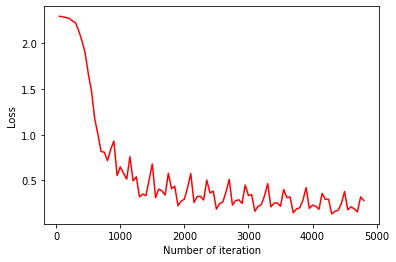

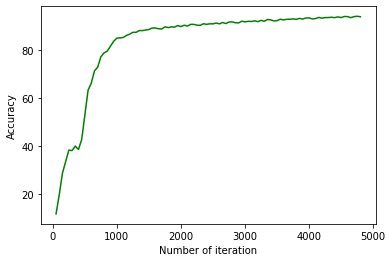

In [5]:
# visualization loss 
plt.plot(iteration_list,loss_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "green")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.show()

In [6]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
      
        #### DESIGN LAYERS :
        ### SEQUENCE: CONV1,ACTIVATION1,POOLING1,  CONV2,ACTIVATION2,POOLING2, LINEAR(FC)
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(32 * 4 * 4, 10)


    def forward(self, x):
        # COMBINE LAYERS
        ## 1) CONV1
        out = self.cnn1(x)

        ## 2) ACTIVATION1
        out = self.relu1(out)

        ## 3) POOLING1
        out = self.maxpool1(out)
       
        ## 4) CONV2
        out = self.cnn2(out)

        ## 5) ACTIVATION2
        out = self.relu2(out)

        ## 6) POOLING2
        out = self.maxpool2(out)

        ## 7) flatten ########## DURING LAB WE JUST FORGOT FOLLOWING FLATTEN LAYER ###############
        out = out.view(out.size(0), -1)

        ## 8) LINEAR(FC)
        out = self.fc1(out)
        
        return out


# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create CNN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [7]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()     
        
        # Update parameters
        optimizer.step()    
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Iteration: 500  Loss: 0.14150696992874146  Accuracy: 96.75 %
Iteration: 1000  Loss: 0.05599930137395859  Accuracy: 97.73999786376953 %
Iteration: 1500  Loss: 0.05379960685968399  Accuracy: 98.13999938964844 %
Iteration: 2000  Loss: 0.0199576523154974  Accuracy: 98.3499984741211 %


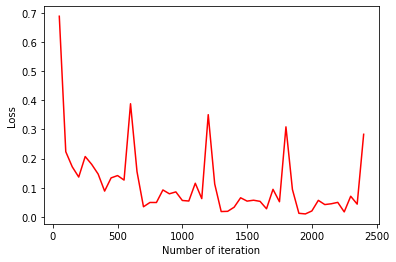

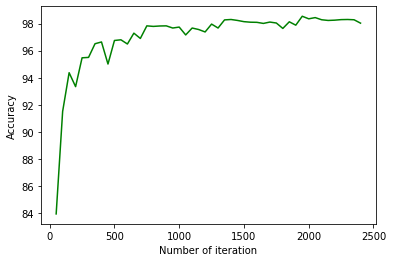

In [8]:
# visualization loss 
plt.plot(iteration_list,loss_list,color="red")
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "green")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.show()

Try CNN on "Fruit" dataset. Also modify number of layers and observe the performance difference: 

https://www.kaggle.com/moltean/fruits


Or (In a case if you don't have that much dataPack available, download 20 images of apple and 20 images of orange from the internet and work on it with RANDOM state=Rollnumber stratergy, 80-20% training-testing division)





